# Churn Prediction and Customer Segmentation

## Exploratory Data Analysis

### 1.Data Ingestion and Basic Stats

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import chi2_contingency

In [2]:
# Directory setting

os.chdir('D:\\GitHub\\Churn Prediction and Customer Segmentation')
print(os.getcwd())

D:\GitHub\Churn Prediction and Customer Segmentation


In [48]:
df = pd.read_csv('data\\raw\\telcom_behavior.csv')

In [93]:
print(df.head())

   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.

In [94]:
print(df.shape)

(505207, 12)


In [6]:
print(df.describe().T)

                     count           mean            std    min       25%  \
CustomerID        505206.0  200779.451782  137241.343095    1.0  63827.25   
Age               505206.0      39.704172      12.670577   18.0     29.00   
Tenure            505206.0      31.350435      17.237482    1.0     16.00   
Usage Frequency   505206.0      15.714825       8.619323    1.0      8.00   
Support Calls     505206.0       3.833317       3.133603    0.0      1.00   
Payment Delay     505206.0      13.496843       8.451187    0.0      6.00   
Total Spend       505206.0     620.072766     245.319256  100.0    446.00   
Last Interaction  505206.0      14.610581       8.608286    1.0      7.00   
Churn             505206.0       0.555203       0.496944    0.0      0.00   

                       50%        75%       max  
CustomerID        193039.5  321645.75  449999.0  
Age                   40.0      49.00      65.0  
Tenure                32.0      46.00      60.0  
Usage Frequency       16.0   

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB
None


### 2.Profiling and Validating

In [96]:
print(df.isnull().sum())

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [9]:
df[df.isnull().any(axis=1)]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(df.duplicated().sum())

0


### 3.Exploration

In [11]:
for col in df.select_dtypes(include='object').columns:
    print(f'{col}, Unique Values: {df[col].nunique()}')

Gender, Unique Values: 2
Subscription Type, Unique Values: 3
Contract Length, Unique Values: 3


In [95]:
print(df.Churn.value_counts())
print((df.Churn.value_counts()*100)/len(df))

Churn
1.0    280492
0.0    224714
Name: count, dtype: int64
Churn
1.0    55.520213
0.0    44.479590
Name: count, dtype: float64


In [13]:
print(df['Subscription Type'].value_counts())

Subscription Type
Standard    170630
Premium     170099
Basic       164477
Name: count, dtype: int64


In [14]:
print(df['Contract Length'].value_counts())

Contract Length
Annual       198608
Quarterly    197364
Monthly      109234
Name: count, dtype: int64


### Univariate Analysis

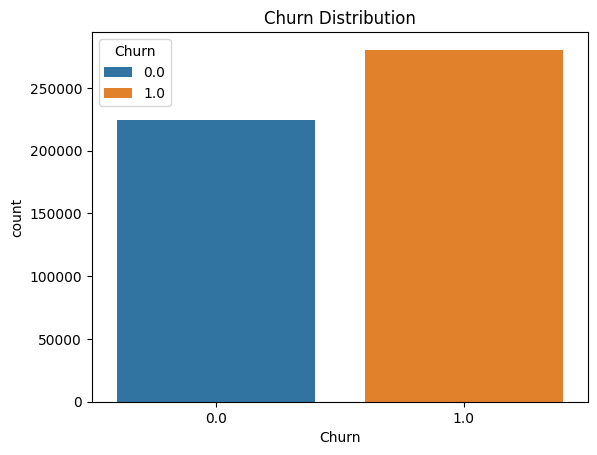

In [15]:
sns.countplot(x='Churn', data=df, hue='Churn')
plt.title('Churn Distribution')
plt.savefig('output/charts/churn_distribution.png')

##### Churn and retention seems quite balanced. In fact more customer churned than retained. Not good for a growing company. Need more robust retention stategy.

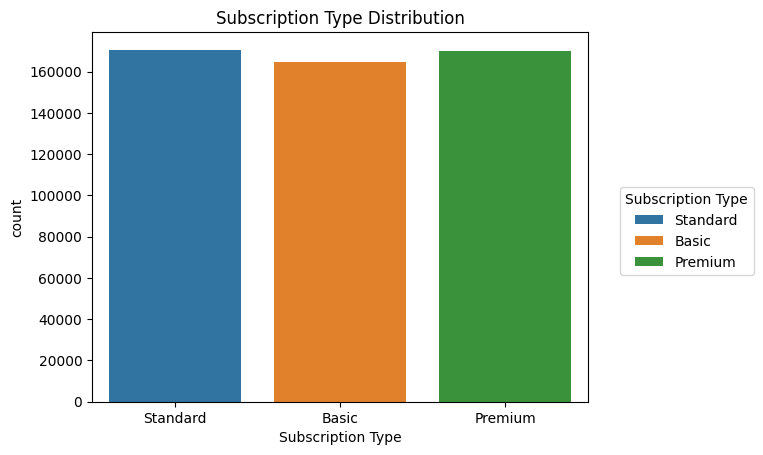

In [87]:
sns.countplot(x='Subscription Type', data=df, hue='Subscription Type')
plt.legend(title='Subscription Type', bbox_to_anchor=(1.05, .6))
plt.title('Subscription Type Distribution')
plt.savefig('output/charts/subscription_type_distribution.png')

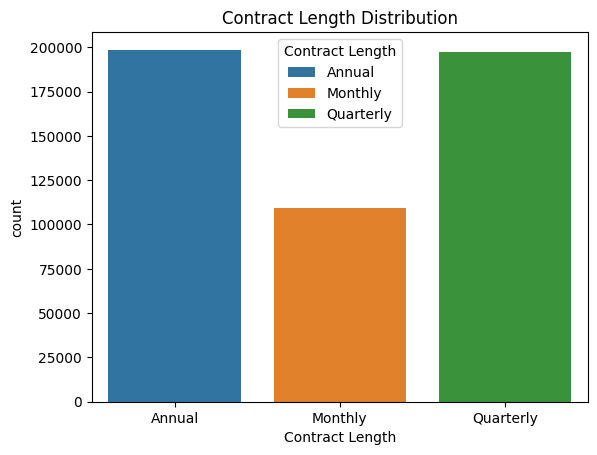

In [85]:
sns.countplot(x='Contract Length', data=df, hue='Contract Length')
plt.title('Contract Length Distribution')
plt.savefig('output/charts/contract_length_distribution.png')

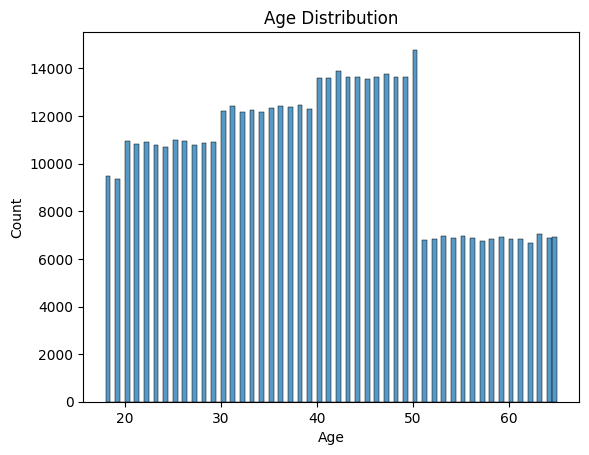

In [22]:
sns.histplot(x='Age', data=df)
plt.title('Age Distribution')
plt.savefig('output/charts/age_distribution.png')

##### Customers range from around 18 to 65 years.
##### There’s a clear spike around age 50, where customer count exceeds 14,000, likely the most active or loyal segment.
##### Customer numbers decline rapidly after age 50, falling below 8,000 for ages 51+, which may indicate limited engagement or acquisition in older age brackets.
##### Ages under 25 show relatively low counts, implying younger audiences may be less targeted or have lower engagement.


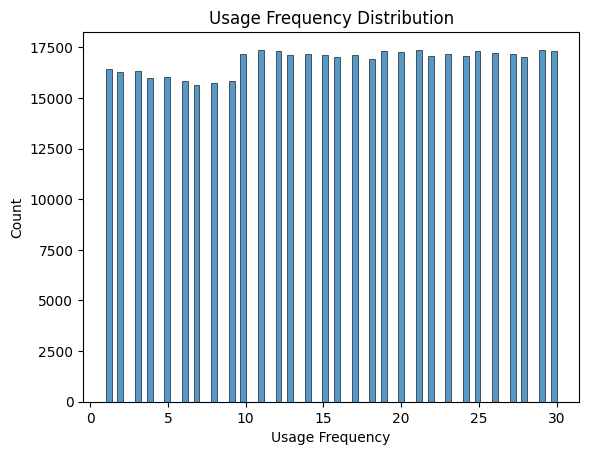

In [68]:
sns.histplot(x='Usage Frequency', data=df)
plt.title('Usage Frequency Distribution')
plt.savefig('output/charts/usage_frequency_distribution.png')

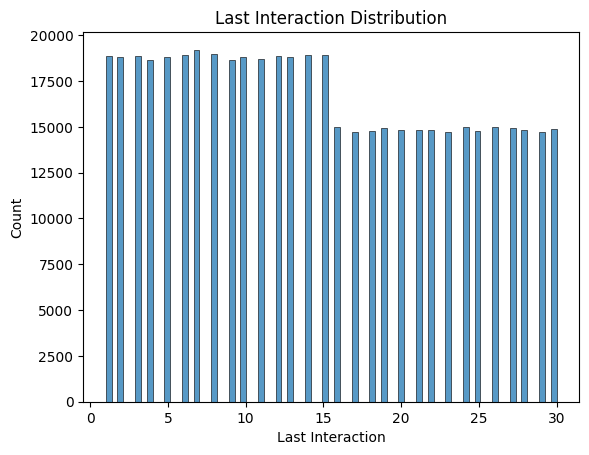

In [69]:
sns.histplot(x='Last Interaction', data=df)
plt.title('Last Interaction Distribution')
plt.savefig('output/charts/last_interaction_distribution.png')

##### Customer interaction with the business in days ranging from 0 to 30.
##### High Engagement in First 15 Days:
##### Customer interaction is strongest within the first 0–14 days, with consistent counts nearing 20,000 — a clear sign of strong engagement or regular activity.
##### Gradual Decline After Day 15:
##### Post day 15, interaction counts drop progressively, falling to around 12,500–15,000 toward day 30. This suggests decreasing customer activity over time.


### Bivariate Analysis

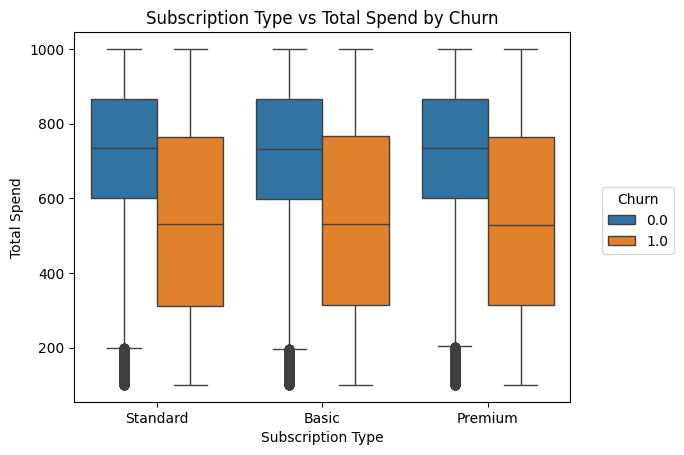

In [84]:
sns.boxplot(x='Subscription Type', y='Total Spend', data=df, hue='Churn')
plt.title('Subscription Type vs Total Spend by Churn')
plt.legend(title='Churn', bbox_to_anchor=(1.05, 0.6))
plt.savefig('output/charts/subscription_type_total_spend.png')


##### Premium Customers Spend More:
##### Regardless of churn status, Premium users show the highest total spend — especially those who haven’t churned. Their median spend is clearly above other groups.
##### Churned Customers Spend Less Overall:
##### For each subscription type, churned users (orange boxes) tend to have lower spend values and narrower ranges, possibly indicating shorter usage periods or less engagement.


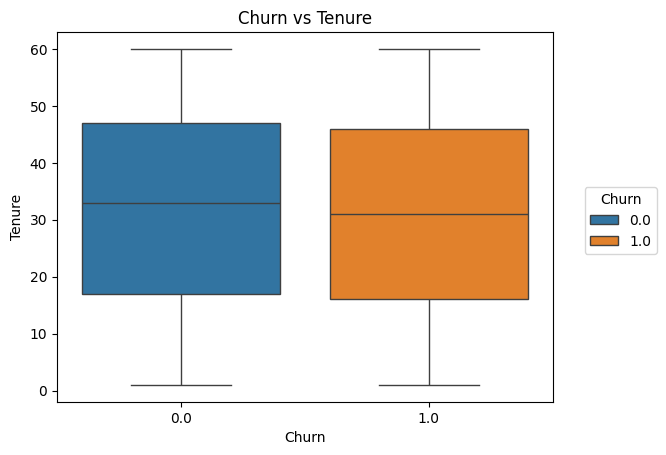

In [83]:
sns.boxplot(x='Churn', y='Tenure', data=df, hue='Churn')
plt.title('Churn vs Tenure')
plt.legend(title='Churn', bbox_to_anchor=(1.05, 0.6))
plt.savefig('output/charts/churn_tenure.png')

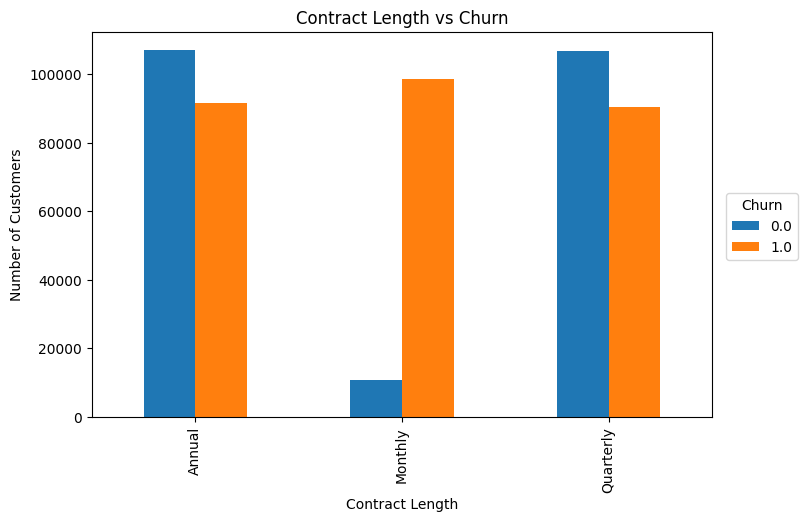

In [82]:
grouped = df.groupby(['Contract Length', 'Churn']).size().unstack(fill_value=0)
grouped.plot(kind='bar', figsize=(8, 5))
plt.title('Contract Length vs Churn')
plt.xlabel('Contract Length')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', bbox_to_anchor=(1.15, .6))
plt.savefig('output/charts/contract_length_churn.png')

##### Monthly Contracts = High Churn Risk:
##### Monthly plans show a disproportionately high number of churned customers the orange bar towers over the blue. This suggests low customer commitment and frequent drop-off.
##### Annual Contracts Retain Well:
##### Customers with annual contracts are far more likely to stay — churned counts are much lower than active ones. Indicates strong retention tied to long-term commitment.
##### Quarterly Contracts Sit in the Middle:
##### A balanced mix of churned and non-churned customers — better retention than monthly, but not as solid as annual.


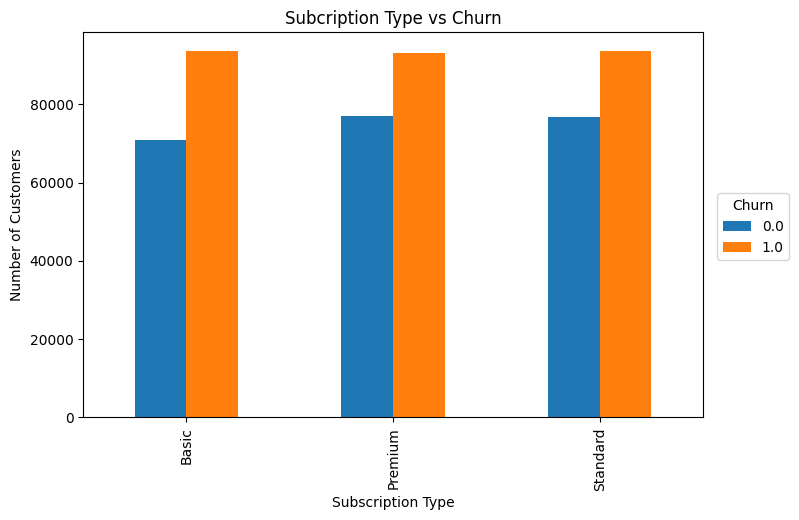

In [88]:
grouped = df.groupby(['Subscription Type', 'Churn']).size().unstack(fill_value=0)
grouped.plot(kind='bar', figsize=(8, 5))
plt.title('Subcription Type vs Churn')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', bbox_to_anchor=(1.15, .6))
plt.savefig('output/charts/subscription_type_churn.png')

### Mutlivariate Analysis

In [97]:
sub = {'Basic':1, 'Standard': 2, 'Premium': 3}
df['Subscription Type'] = df['Subscription Type'].map(sub)

con = {'Monthly': 1, 'Quarterly': 2, 'Annual': 3}
df['Contract Length'] = df['Contract Length'].map(con)

gen = {'Female': 0, 'Male': 1}
df['Gender'] = df['Gender'].map(gen)

In [100]:
print(df.corr()['Churn'])

CustomerID          -0.650617
Age                  0.191224
Gender              -0.168989
Tenure              -0.021308
Usage Frequency     -0.053263
Support Calls        0.516283
Payment Delay        0.329785
Subscription Type   -0.017399
Contract Length     -0.296549
Total Spend         -0.369682
Last Interaction     0.127150
Churn                1.000000
Name: Churn, dtype: float64


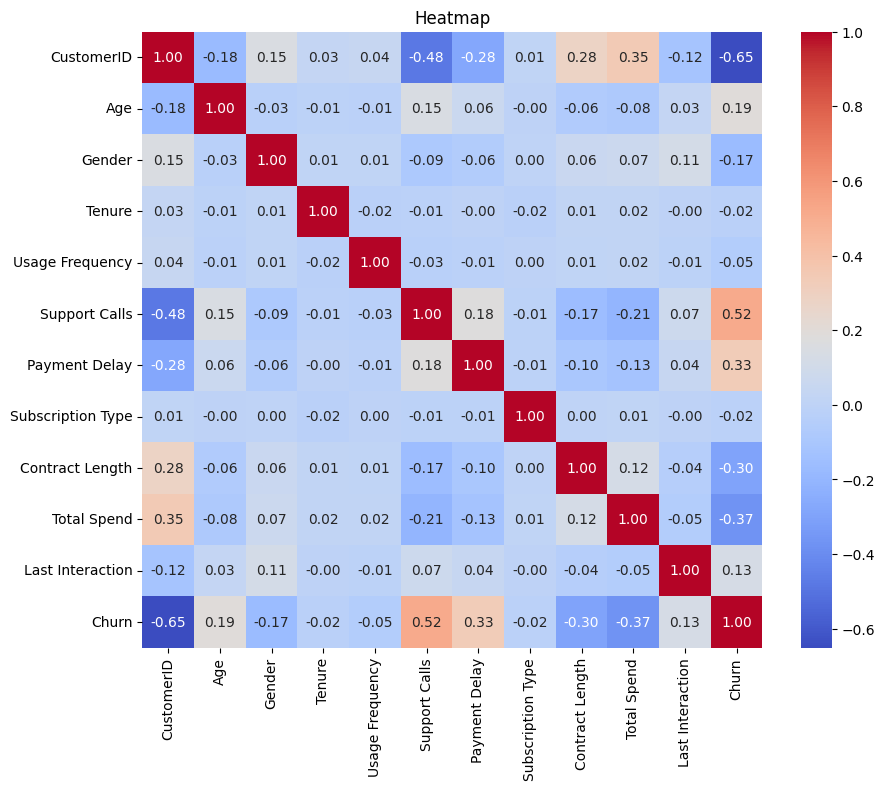

In [98]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap')
plt.savefig('output/charts/heatmap.png')

##### CustomerID: –0.65
##### Likely a data artifact — customer ID should be excluded from analysis since it’s just a unique identifier, not a meaningful feature.
##### Support Calls: +0.52
##### Customers who make more support calls are more likely to churn. This may signal frustration, unresolved issues, or poor user experience.
##### Payment Delay: +0.33
##### A moderate positive link — delays in payment may reflect dissatisfaction or financial strain, contributing to churn risk.
##### Total Spend: –0.37
##### Higher spenders are less likely to churn, indicating better engagement or perceived value.
##### Contract Length: –0.30
##### Longer contracts reduce churn likelihood, pointing to the retention power of annual or multi-term plans.


## 4.Statistiacl Test
### Chi-Sqaure Test of Independence

##### Monthly contract length leads to high customer churn rate. Is this happening by chance or real?
### Research Question
##### Is there a statistically significant association between a customer’s contract length and their likelihood to churn?

##### Chi-Square Hypotheses
##### Null Hypothesis (H₀):
##### Contract length and churn status are independent. There is no relationship between the type of contract and whether a customer churns.
##### Alternative Hypothesis (H₁):
##### Contract length and churn status are not independent. There is a significant relationship between the type of contract and customer churn.


In [103]:
# Create a contingency table
contingency_table = pd.crosstab(df['Contract Length'], df['Churn'])

# Run the test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi2 Statistic: {chi2:.3f}')
print(f'p-value: {p:.4f}')

if p < 0.05:
    print("✅ Significant association between Contract Length and Churn")
else:
    print("❌ No significant association — might be due to random variation")

Chi2 Statistic: 67861.647
p-value: 0.0000
✅ Significant association between Contract Length and Churn


##### Statistical Strength:
##### That enormous Chi2 value paired with a near-zero p-value means your test detected a highly significant association — almost certainly not due to random chance.
##### Customer Behavior Patterns:
##### The type of contract (Monthly vs. Yearly) directly influences how likely a customer is to churn. For example:
##### Monthly customers may have higher churn due to low commitment.
##### Annual customers are likely more stable or have incentives to stay longer.
##### Model Feature Importance:
##### Contract Length is now statistically validated as a key feature in predictive modeling pipeline. Logistic regression or tree-based models will likely rank this variable as a top predictor.
##### Segmentation Strategy:
##### Segmenting users based on contract types now has a data-backed rationale.
##### Can design retention efforts specifically for high-risk segments (e.g., Monthly contracts).
